In [1]:
import glob
import os

import pandas as pd
import ast

In [76]:
from tqdm import tqdm
tqdm.pandas()  # This is necessary to enable progress_apply

In [82]:
INPUT_DIR = '/shared/3/projects/citation-context/s2orc/s2orc_split/'
# INPUT_DIR = '/shared/3/projects/citation-context/s2orc/s2orc_merge/'
INPUT_FILE_LIST = glob.glob(os.path.join(INPUT_DIR, "s2orc_*.tsv"))

for filename in INPUT_FILE_LIST[:1]:
    print(filename)
    df_split = pd.read_csv(filename, sep='\t', nrows= 1000)

print(df_split.shape)
df_split.head(2)

/shared/3/projects/citation-context/s2orc/s2orc_split/s2orc_0_processed.tsv
(4, 3)


,corpusid,sentences,embeddings
0,260125657,['\nMultifidelity Covariance Estimation via Re...,[[-0.05868788 -0.00510878 0.01123886 ... -0.0...
1,260109533,['\n\n\n\nA Wernich \nMit Berücksichtigung\nöf...,[[ 0.00798091 -0.01434709 0.01918747 ... -0.0...


In [83]:
INPUT_FILE_LIST

['/shared/3/projects/citation-context/s2orc/s2orc_split/s2orc_0_processed.tsv']

In [84]:
!ls /shared/3/projects/citation-context/s2orc/

authors		  df_visual_10_12.tsv		 s2orc_id_file_dictionary.json
citations	  df_visual_10_19.tsv		 s2orc_merge
combined_authors  df_visual_3.tsv		 s2orc_similarity
df_mini_save.tsv  papers			 s2orc_split
df_mini.tsv	  s2orc
df_tri_merge.tsv  s2orc_file_id_dictionary.json


In [ ]:
!ls /shared/3/projects/citation-context/s2orc/

In [85]:
FOLDER_NAME = 'papers'
# authors  citations  papers  s2orc

INPUT_DIR = f'/shared/3/projects/citation-context/s2orc/{FOLDER_NAME}/'
OUTPUT_DIR = '/shared/3/projects/citation-context/s2orc/'

# INPUT_FILE_LIST = [os.path.basename(x) for x in glob.glob(INPUT_DIR + "*.jsonl.gz")]
INPUT_FILE_LIST = [x for x in glob.glob(INPUT_DIR + FOLDER_NAME + "_*")]
# INPUT_FILE_LIST = [x for x in glob.glob(INPUT_DIR + FOLDER_NAME + "_*")][:1]
# INPUT_FILE_LIST = [
#     "/Users/hakunamatata/Dropbox (University of Michigan)/Hong Chen’s files/Home/samples/citations/citations-sample.jsonl"]
OUTPUT_FILE = OUTPUT_DIR + f"combined_{FOLDER_NAME}_3"

In [106]:
import json

FOLDER_NAME = 's2orc'

INPUT_DIR = f'/shared/3/projects/citation-context/s2orc/{FOLDER_NAME}/'
INPUT_FILE_LIST = [x for x in glob.glob(INPUT_DIR + FOLDER_NAME + "_*")]
filename = INPUT_FILE_LIST[0]


In [107]:
try:
    with open(filename, 'r') as file_in_process:
        line = file_in_process.readline()
#         line = file_in_process.readline().strip()  # Read and strip the first line

#         if line:  # Process the line only if it's not empty
#             try:
#                 data = json.loads(line)  # Try to parse the line as JSON
#                 print("JSON data:", data)  # Output the data (or handle it as needed)
#             except json.JSONDecodeError:  # Handle possible JSON decoding errors
#                 print(f"Error decoding JSON for line: {line}")
#         else:
#             print("The first line is empty.")  # Handle the case where the first line is empty
except FileNotFoundError:
    print(f"File not found: {filename}")
except Exception as e:
    print(f"An error occurred: {e}")
    

In [108]:
json.loads(line) # s2orc

{'corpusid': 260125657,
 'externalids': {'arxiv': '2307.12438',
  'mag': None,
  'acl': None,
  'pubmed': None,
  'pubmedcentral': None,
  'dblp': None,
  'doi': None},
 'content': {'source': {'pdfurls': ['https://export.arxiv.org/pdf/2307.12438v1.pdf'],
   'pdfsha': '69da9ebeb5511d4ed0a4ec1a1ba7a23d22ab72c5',
   'oainfo': None},
  'text': '\nMultifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *\n\n\nAimee Maurais \nTerrence Alsup \nBenjamin Peherstorfer \nYoussef Marzouk \nMultifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *\ncovariance estimationmultifidelity methodsRiemannian geometrystatistical couplingestima- tion on manifoldsMahalanobis distance MSC codes 15B4815B5753Z5062J0265J1065J1565J20\nWe introduce a multifidelity estimator of covariance matrices formulated as the solution to a regression problem on the manifold of symmetric positive definite matrices. The estimato

In [114]:
j = json.loads(line)
j['content']['annotations'].keys()

dict_keys(['abstract', 'author', 'authoraffiliation', 'authorfirstname', 'authorlastname', 'bibauthor', 'bibauthorfirstname', 'bibauthorlastname', 'bibentry', 'bibref', 'bibtitle', 'bibvenue', 'figure', 'figurecaption', 'figureref', 'formula', 'paragraph', 'publisher', 'sectionheader', 'table', 'tableref', 'title', 'venue'])

In [118]:
j['content']['annotations']['author']

'[{"end":126,"start":112},{"end":142,"start":127},{"end":165,"start":143},{"end":182,"start":166}]'

In [121]:
json.loads(j['content']['annotations']['abstract'])

{'end': 1547, 'start': 465}

In [134]:
annotation


{'abstract': '[{"end":1547,"start":465}]',
 'author': '[{"end":126,"start":112},{"end":142,"start":127},{"end":165,"start":143},{"end":182,"start":166}]',
 'authoraffiliation': None,
 'authorfirstname': '[{"end":117,"start":112},{"end":135,"start":127},{"end":151,"start":143},{"end":173,"start":166}]',
 'authorlastname': '[{"end":125,"start":118},{"end":141,"start":136},{"end":164,"start":152},{"end":181,"start":174}]',
 'bibauthor': '[{"end":93536,"start":93524},{"end":93546,"start":93536},{"end":93559,"start":93546},{"end":93814,"start":93802},{"end":94035,"start":94024},{"end":94046,"start":94035},{"end":94056,"start":94046},{"end":94066,"start":94056},{"end":94462,"start":94452},{"end":94473,"start":94462},{"end":94483,"start":94473},{"end":94796,"start":94783},{"end":94805,"start":94796},{"end":95063,"start":95053},{"end":95215,"start":95205},{"end":95223,"start":95215},{"end":95230,"start":95223},{"end":95521,"start":95509},{"end":95531,"start":95521},{"end":95887,"start":95877},

In [137]:
annotation.keys()

dict_keys(['abstract', 'author', 'authoraffiliation', 'authorfirstname', 'authorlastname', 'bibauthor', 'bibauthorfirstname', 'bibauthorlastname', 'bibentry', 'bibref', 'bibtitle', 'bibvenue', 'figure', 'figurecaption', 'figureref', 'formula', 'paragraph', 'publisher', 'sectionheader', 'table', 'tableref', 'title', 'venue'])

In [136]:
j = json.loads(line)
annotation = j['content']['annotations']
text = j['content']['text']
for key, value in annotation.items():
    print(key)
    if annotation[key] is not None:
        data = json.loads(annotation[key])

        for i in data:
            start = i["start"]
            end = i["end"]
            text_trunk = text[start:end]
            print(text_trunk)
    print('\n')

abstract
We introduce a multifidelity estimator of covariance matrices formulated as the solution to a regression problem on the manifold of symmetric positive definite matrices. The estimator is positive definite by construction, and the Mahalanobis distance minimized to obtain it possesses properties which enable practical computation. We show that our manifold regression multifidelity (MRMF) covariance estimator is a maximum likelihood estimator under a certain error model on manifold tangent space. More broadly, we show that our Riemannian regression framework encompasses existing multifidelity covariance estimators constructed from control variates. We demonstrate via numerical examples that our estimator can provide significant decreases, up to one order of magnitude, in squared estimation error relative to both single-fidelity and other multifidelity covariance estimators. Furthermore, preservation of positive definiteness ensures that our estimator is compatible with downstream

In [113]:
j['content']['text']

'\nMultifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *\n\n\nAimee Maurais \nTerrence Alsup \nBenjamin Peherstorfer \nYoussef Marzouk \nMultifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *\ncovariance estimationmultifidelity methodsRiemannian geometrystatistical couplingestima- tion on manifoldsMahalanobis distance MSC codes 15B4815B5753Z5062J0265J1065J1565J20\nWe introduce a multifidelity estimator of covariance matrices formulated as the solution to a regression problem on the manifold of symmetric positive definite matrices. The estimator is positive definite by construction, and the Mahalanobis distance minimized to obtain it possesses properties which enable practical computation. We show that our manifold regression multifidelity (MRMF) covariance estimator is a maximum likelihood estimator under a certain error model on manifold tangent space. More broadly, we show tha

In [105]:
json.loads(line) # citation

{'citingcorpusid': 400627,
 'citedcorpusid': 26030700,
 'isinfluential': False,
 'contexts': None,
 'intents': None}

In [102]:
json.loads(line) # author

{'authorid': '39265526',
 'externalids': None,
 'url': 'https://www.semanticscholar.org/author/39265526',
 'name': 'R. Fiedler',
 'aliases': ['R Fiedler', 'R. Fiedler', 'Roman Fiedler'],
 'affiliations': None,
 'homepage': None,
 'papercount': 55,
 'citationcount': 775,
 'hindex': 16}

In [99]:
json.loads(line) # paper

{'corpusid': 46851114,
 'externalids': {'ACL': None,
  'DBLP': None,
  'ArXiv': None,
  'MAG': '2747375629',
  'CorpusId': '46851114',
  'PubMed': '28826107',
  'DOI': '10.1016/j.saa.2017.08.020',
  'PubMedCentral': None},
 'url': 'https://www.semanticscholar.org/paper/79f37a34709401249bd93ddd4fb8e4fd7d89dd82',
 'title': 'Maximum likelihood estimation based regression for multivariate\xa0calibration.',
 'authors': [{'authorId': '2110555168', 'name': 'Lu Guo'},
  {'authorId': '2444202', 'name': 'Jiangtao Peng'},
  {'authorId': '48756525', 'name': 'Qiwei Xie'}],
 'venue': 'Spectrochimica Acta Part A - Molecular and Biomolecular Spectroscopy',
 'publicationvenueid': '5bc5dd42-09ab-4ce7-bf5b-8355ee95577c',
 'year': 2018,
 'referencecount': 18,
 'citationcount': 2,
 'influentialcitationcount': 0,
 'isopenaccess': False,
 's2fieldsofstudy': [{'category': 'Mathematics', 'source': 's2-fos-model'},
  {'category': 'Chemistry', 'source': 'external'},
  {'category': 'Medicine', 'source': 'external

In [ ]:

    

try:
    with open(filename, 'r') as file_in_process:
        for line in file_in_process:
            line = line.strip()
            if not line:
                continue  # Skip empty lines
            try:
                data = json.loads(line)
                print("JSON data:", data)
            except json.JSONDecodeError:
                print(f"Error decoding JSON for line: {line}")
                continue
except FileNotFoundError:
    print(f"File not found: {filename}")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
    for file in INPUT_FILE_LIST:


In [86]:
INPUT_FILE_LIST

['/shared/3/projects/citation-context/s2orc/papers/papers_0',
 '/shared/3/projects/citation-context/s2orc/papers/papers_1',
 '/shared/3/projects/citation-context/s2orc/papers/papers_2',
 '/shared/3/projects/citation-context/s2orc/papers/papers_3',
 '/shared/3/projects/citation-context/s2orc/papers/papers_4',
 '/shared/3/projects/citation-context/s2orc/papers/papers_5',
 '/shared/3/projects/citation-context/s2orc/papers/papers_6',
 '/shared/3/projects/citation-context/s2orc/papers/papers_7',
 '/shared/3/projects/citation-context/s2orc/papers/papers_8',
 '/shared/3/projects/citation-context/s2orc/papers/papers_9',
 '/shared/3/projects/citation-context/s2orc/papers/papers_10',
 '/shared/3/projects/citation-context/s2orc/papers/papers_11',
 '/shared/3/projects/citation-context/s2orc/papers/papers_12',
 '/shared/3/projects/citation-context/s2orc/papers/papers_13',
 '/shared/3/projects/citation-context/s2orc/papers/papers_14',
 '/shared/3/projects/citation-context/s2orc/papers/papers_15',
 '

In [68]:
INPUT_DIR = '/shared/3/projects/citation-context/s2orc/s2orc_merge/'
INPUT_FILE_LIST = glob.glob(os.path.join(INPUT_DIR, "s2orc_*_ims_added.tsv"))

for filename in INPUT_FILE_LIST[:1]:
    df_ims = pd.read_csv(filename, sep='\t', 
#                          usecols=["corpusid_from_cited", "similarity_list"])
                         nrows= 10000,
                         usecols=["corpusid_from_cited", "corpusid_from_citing",
                                  "year_from_citing", "fieldsofstudy_s2_from_citing_one",
                                  "similarity_list",
                                 ])

print(df_ims.shape)
df_ims.head(2)

(10000, 5)


,corpusid_from_citing,year_from_citing,corpusid_from_cited,fieldsofstudy_s2_from_citing_one,similarity_list
0,23071961.0,2017.0,18894099.0,Biology,"[1.8911230564117432, 1.804802417755127, 1.0, 2..."
1,48363151.0,2018.0,18894099.0,Biology,"[1.8150666952133179, 2.3968653678894043, 1.364..."


In [43]:
# df_ims_chunk = df_ims.head(100000)

In [44]:
df_ims_chunk['similarity_list'] = df_ims_chunk['similarity_list'].progress_apply(ast.literal_eval)
df_ims_chunk['max_similarity'] = df_ims_chunk['similarity_list'].progress_apply(lambda x: max(x))

100%|██████████████████████████████████| 100000/100000 [12:50<00:00, 129.76it/s]
/tmp/ipykernel_205985/2779479720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ims_chunk['similarity_list'] = df_ims_chunk['similarity_list'].progress_apply(ast.literal_eval)
100%|████████████████████████████████| 100000/100000 [00:04<00:00, 22896.84it/s]
/tmp/ipykernel_205985/2779479720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ims_chunk['max_similarity'] = df_ims_chunk['similarity_list'].progress_apply(l

In [69]:
df_ims['similarity_list'] = df_ims['similarity_list'].progress_apply(ast.literal_eval)

df_ims['max_similarity'] = df_ims['similarity_list'].progress_apply(lambda x: max(x))



100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 18330.43it/s]


In [70]:
tuples_set = set(zip(df_ims['corpusid_from_citing'], df_ims['corpusid_from_cited']))


In [71]:
# Function to process each group
def count_same_x(group):

    # Initialize a new column to store results
    group['new_col'] = 0  # Start with all zeros
    
    # Iterate through each row index in group
    for i in group.index:
        # Check for any '1' results in comparisons with all other rows
        has_one = False  # Flag to track if we encounter any '1'
        for j in group.index:
        
            if i != j and (group.at[i, 'corpusid_from_citing'], group.at[j, 'corpusid_from_citing']) in tuples_set:
                has_one = True
                break  # Break as soon as we find a '1'
        
        # Assign '1' to new column if any comparison yielded '1'
        if has_one:
            group.at[i, 'new_col'] = 1
    
    # Find indices of rows where X is 1 and where X is 0
    ones = group[group['new_col'] == 1]
    zeros = group[group['new_col'] == 0]
    
    
    results = []
    
    if ones.empty or zeros.empty:
        return pd.DataFrame(results, columns=['zeros', 'ones'])
    
    print("d")
    for i in ones.index:
        for j in zeros.index:
            if group.loc[i, 'year_from_citing'] == group.loc[j, 'year_from_citing']:
                if group.loc[i, 'fieldsofstudy_s2_from_citing_one'] == group.loc[j, 'fieldsofstudy_s2_from_citing_one']:
                    result = (group.loc[i, 'max_similarity'], group.loc[j, 'max_similarity'])
                    results.append(result)

    return pd.DataFrame(results, columns=['zeros', 'ones'])


In [72]:
df_group = df_ims.groupby('corpusid_from_cited').progress_apply(count_same_x)
df_group

100%|█████████████████████████████████████████| 271/271 [01:22<00:00,  3.27it/s]


,,zeros,ones
corpusid_from_cited,,,


In [73]:
df_ims

,corpusid_from_citing,year_from_citing,corpusid_from_cited,fieldsofstudy_s2_from_citing_one,similarity_list,max_similarity
0,23071961.0,2017.0,18894099.0,Biology,"[1.8911230564117432, 1.804802417755127, 1.0, 2...",2.707930
1,48363151.0,2018.0,18894099.0,Biology,"[1.8150666952133179, 2.3968653678894043, 1.364...",2.848179
2,233245415.0,2021.0,18894099.0,Biology,"[1.105857491493225, 1.0, 1.107691764831543, 1....",2.292985
3,231788614.0,2021.0,18894099.0,Biology,"[1.4034950733184814, 1.9894063472747803, 1.481...",2.639354
4,242865.0,2016.0,18894099.0,Computer Science,"[1.8387370109558105, 2.1778833866119385, 1.0, ...",2.765872
...,...,...,...,...,...,...
9995,22134594.0,2012.0,15414199.0,Biology,"[2.590374231338501, 1.273476481437683, 1.0, 2....",3.229117
9996,24641404.0,2011.0,15414199.0,Biology,"[2.3363871574401855, 1.3737430572509766, 1.332...",3.745847
9997,24641404.0,2011.0,15414199.0,Biology,"[3.4335787296295166, 1.2462432384490967, 1.132...",3.626466
9998,11396469.0,2014.0,15414199.0,Biology,"[3.87772274017334, 1.1566001176834106, 1.37373...",4.401370


In [55]:
df_ims_chunk['length_of_article'] = df_ims_chunk['similarity_list'].progress_apply(lambda x: len(x))
df_ims_chunk['length_of_article'].mean()

100%|███████████████████████████████| 100000/100000 [00:00<00:00, 252712.46it/s]
/tmp/ipykernel_205985/959814176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ims_chunk['length_of_article'] = df_ims_chunk['similarity_list'].progress_apply(lambda x: len(x))


644.86227

In [51]:
def calculate_ranges(values):
    
#     a = sum(1 for v in values if 1 <= v < 2) / len(values) * 100
#     b = sum(1 for v in values if 2 <= v < 3) / len(values) * 100
#     c = sum(1 for v in values if 3 <= v < 4) / len(values) * 100
#     d = sum(1 for v in values if 4 <= v <= 5) / len(values) * 100

#     a = sum(1 for v in values if 1 <= v < 2)
#     b = sum(1 for v in values if 2 <= v < 3)
#     c = sum(1 for v in values if 3 <= v < 4)
#     d = sum(1 for v in values if 4 <= v <= 5)
    
    a = sum(1 for v in values if 1 <= v < 1.5)
    b = sum(1 for v in values if 1.5 <= v < 2)
    c = sum(1 for v in values if 2 <= v < 2.5)
    d = sum(1 for v in values if 2.5 <= v < 3)
    e = sum(1 for v in values if 3 <= v < 3.5)
    f = sum(1 for v in values if 3.5 <= v < 4)
    g = sum(1 for v in values if 4 <= v < 4.5)
    h = sum(1 for v in values if 4.5 <= v <= 5)
    
    
    return a, b, c, d ,e, f, g, h

# Apply the function and split the results into three new columns
# df_ims_chunk[['a', 'b', 'c', 'd']] = pd.DataFrame(df_ims_chunk['similarity_list'].progress_apply(lambda lst: calculate_ranges(lst)).tolist(), index=df_ims_chunk.index)
df_ims_chunk[['1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0',
              '3.0-3.5', '3.5-4.0', '4.0-4.5', '4.5-5.0',]] = pd.DataFrame(df_ims_chunk['similarity_list'].progress_apply(lambda lst: calculate_ranges(lst)).tolist(), index=df_ims_chunk.index)


100%|██████████████████████████████████| 100000/100000 [02:01<00:00, 825.90it/s]
/tmp/ipykernel_205985/3513863384.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ims_chunk[['1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0',
/tmp/ipykernel_205985/3513863384.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ims_chunk[['1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0',
/tmp/ipykernel_205985/3513863384.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [33]:
df_ims_chunk

,corpusid_from_cited,similarity_list,max_similarity,a,b,c,d,e
0,18894099.0,"[1.8911230564117432, 1.804802417755127, 1.0, 2...",2.707930,219,34,0,0,0.000000
1,18894099.0,"[1.8150666952133179, 2.3968653678894043, 1.364...",2.848179,163,90,0,0,0.000000
2,18894099.0,"[1.105857491493225, 1.0, 1.107691764831543, 1....",2.292985,252,1,0,0,0.000000
3,18894099.0,"[1.4034950733184814, 1.9894063472747803, 1.481...",2.639354,227,26,0,0,0.000000
4,18894099.0,"[1.8387370109558105, 2.1778833866119385, 1.0, ...",2.765872,211,42,0,0,0.000000
...,...,...,...,...,...,...,...,...
9995,15414199.0,"[2.590374231338501, 1.273476481437683, 1.0, 2....",3.229117,567,52,4,0,0.000000
9996,15414199.0,"[2.3363871574401855, 1.3737430572509766, 1.332...",3.745847,518,82,23,0,0.000000
9997,15414199.0,"[3.4335787296295166, 1.2462432384490967, 1.132...",3.626466,517,81,25,0,0.000000
9998,15414199.0,"[3.87772274017334, 1.1566001176834106, 1.37373...",4.401370,438,142,40,3,0.481541


In [52]:
# df_melted = pd.melt(df_ims_chunk, value_vars=['a', 'b', 'c', 'd',
#                                              'e', 'f', 'g', 'h'], var_name='Variables', value_name='Values')

df_melted = pd.melt(df_ims_chunk, value_vars=['1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0',
              '3.0-3.5', '3.5-4.0', '4.0-4.5', '4.5-5.0',], var_name='Variables', value_name='Values')


In [47]:
df_melted

,Variables,Values
0,a,93
1,a,69
2,a,237
3,a,149
4,a,103
...,...,...
799995,h,0
799996,h,0
799997,h,0
799998,h,0


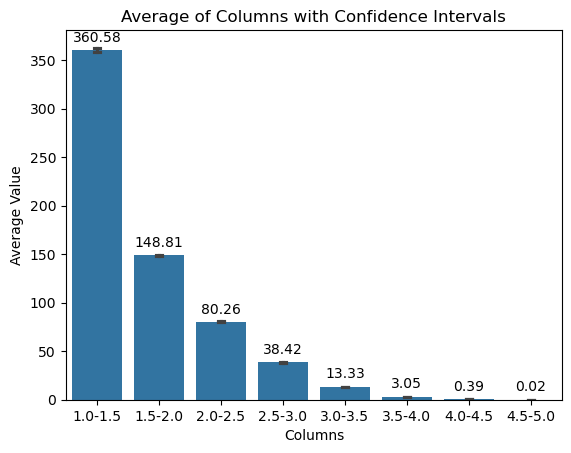

In [53]:
ax = sns.barplot(x='Variables', y='Values', data=df_melted, capsize=0.1)  # capsize controls the size of the error bars
plt.title('Average of Columns with Confidence Intervals')
plt.xlabel('Columns')
plt.ylabel('Average Value')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

In [28]:
df_ims_chunk["a"].value_counts()

0.0    10000
Name: a, dtype: int64

In [49]:
bins = [0, 1, 2, 3, 4, 5]  # Define the bin edges (0-1, 1-2, 2-3)
labels = ['a', 'b', 'c', 'd', 'e', 'f']  # Labels for the bins corresponding to your output columns
df_ims_chunk['category'] = pd.cut(df_ims_chunk['similarity_list'], bins=bins, labels=labels, right=False,
                                  include_lowest=True)

TypeError: '<' not supported between instances of 'int' and 'list'

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

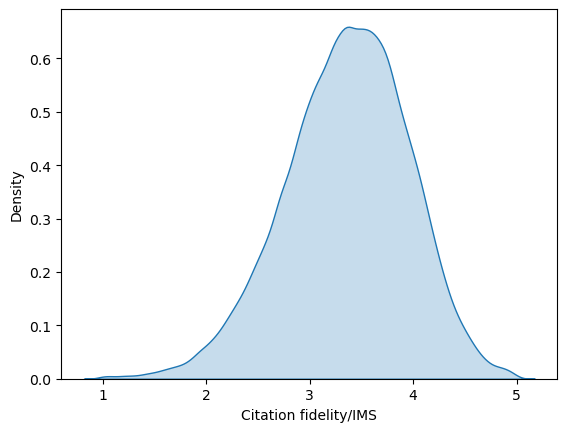

In [75]:
sns.kdeplot(data=df_ims_chunk, x='max_similarity', fill=True)  # fill=True fills the area under the KDE curve
# plt.title('Density Plot of Values')
plt.xlabel('Citation fidelity/IMS')
plt.ylabel('Density')
plt.show()

In [20]:
df_ims_chunk['max_similarity'].min()

1.0

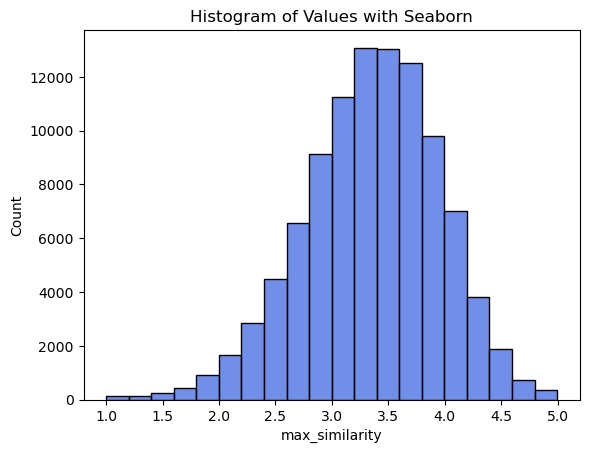

In [57]:
sns.histplot(df_ims_chunk['max_similarity'], bins=20, kde=False, color='royalblue')
plt.title('Histogram of Values with Seaborn')
plt.show()

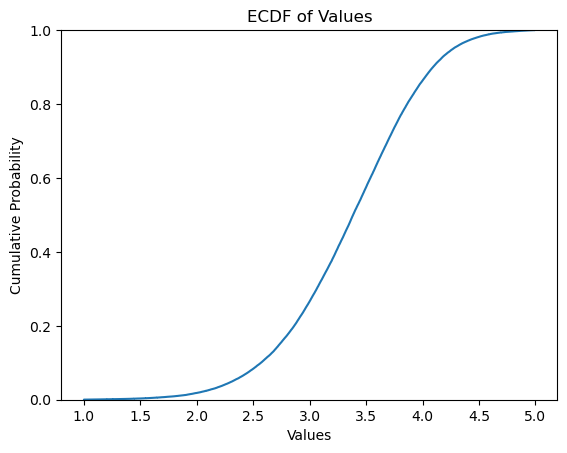

In [58]:
sns.ecdfplot(df_ims_chunk['max_similarity'])
plt.title('ECDF of Values')
plt.xlabel('Values')
plt.ylabel('Cumulative Probability')
plt.show()